In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import wrangle

In [2]:
df = pd.read_fwf('auto-mpg.data', header=None) #these are notes from class
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [3]:
df.columns = ['mpg', 'cylinders', 'displ', 'horsepower', 'weight', 'acceleration', #these are notes from class
            'model_year', 'origin', 'make_model']
df.head()

,mpg,cylinders,displ,horsepower,weight,acceleration,model_year,origin,make_model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
df.isna().sum()#these are notes from class

mpg             0
cylinders       0
displ           0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
make_model      0
dtype: int64

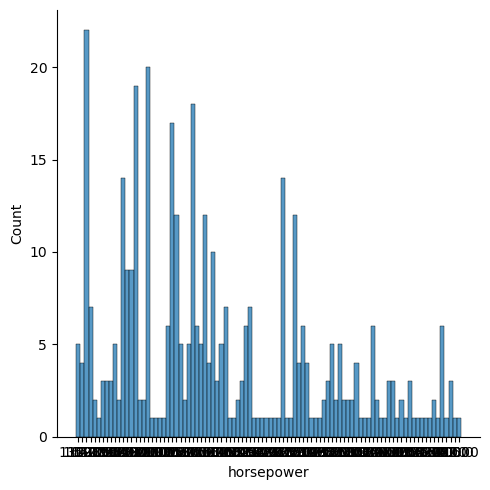

In [5]:
sns.displot(df['horsepower']) #these are notes from class

In [6]:
df = df[df['horsepower'] !='?'] #these are notes from class

In [7]:
df['horsepower'] = df['horsepower'].astype('float') #these are notes from class

In [8]:
train, test = train_test_split(df, train_size=0.7, random_state=42)
train.shape, test.shape #these are notes from class

((274, 9), (118, 9))

In [10]:
from sklearn.preprocessing import MinMaxScaler #these are notes from class

In [11]:
 mm_scaler = MinMaxScaler()#these are notes from class

In [12]:
mm_scaler.fit(train[['horsepower']])#these are notes from class

MinMaxScaler()

In [13]:
mm_horsepower = mm_scaler.transform(train[['horsepower']])#these are notes from class

In [14]:
#these are notes from classtrain['horsepower'].head()

In [15]:
mm_horsepower[:5] #give first 5 elements but not the 5th index

array([[0.25274725],
       [0.2032967 ],
       [0.24175824],
       [0.23076923],
       [0.28571429]])

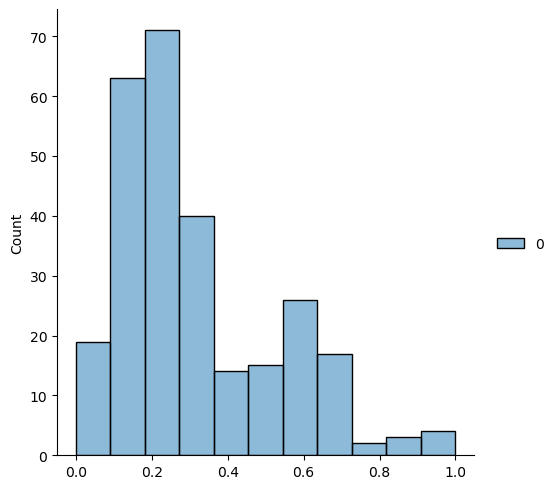

In [16]:
sns.displot(mm_horsepower)
plt.show()#these are notes from class


# Standard Scaling

In [19]:
from sklearn.preprocessing import StandardScaler#these are notes from class
# has to do the number of standard deviations it is away from the mean

In [20]:
ss_scaler = StandardScaler()#these are notes from class

In [22]:
df = ss_scaler.fit(train[['horsepower']])#these are notes from class

In [23]:
df

StandardScaler()

In [24]:
ss_horsepower = ss_scaler.transform(train[['horsepower']])#these are notes from class

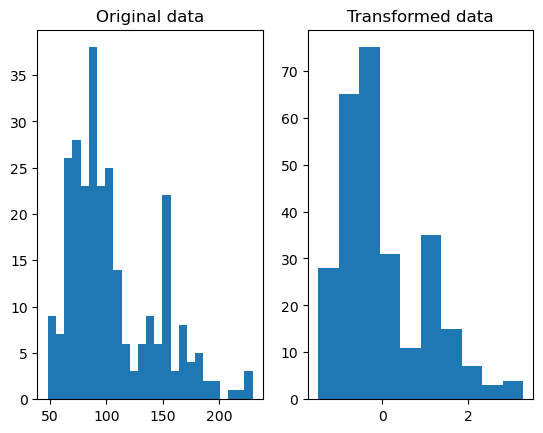

In [25]:
plt.subplot(121)
plt.hist(train['horsepower'], bins=25)
plt.title('Original data')

plt.subplot(122)
plt.hist(ss_horsepower)
plt.title('Transformed data')
plt.show()#these are notes from class

In [26]:
def compare_plots(transformed_data, original_data=train['horsepower']):
    plt.subplot(121)
    plt.hist(train['horsepower'], bins=25)
    plt.title('Original data')

    plt.subplot(122)
    plt.hist(ss_horsepower)
    plt.title('Transformed data')
    plt.show()#these are notes from class

# Robust Scaling

In [27]:
from sklearn.preprocessing import RobustScaler#these are notes from class

In [28]:
rs_scaler = RobustScaler()#these are notes from class

In [29]:
rs_scaler.fit(train[['horsepower']])#these are notes from class

RobustScaler()

In [30]:
rs_horsepower = rs_scaler.transform(train[['horsepower']])#these are notes from class

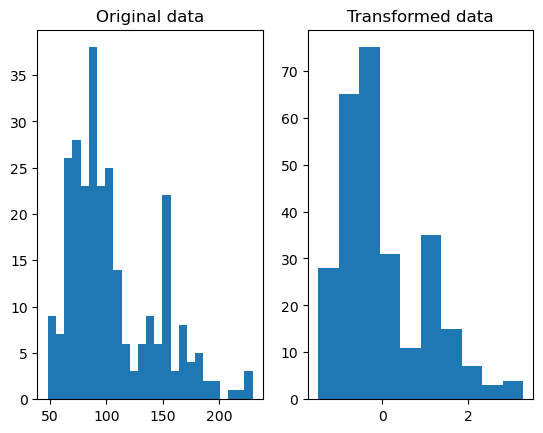

In [31]:
compare_plots(rs_horsepower)#these are notes from class

In [36]:
rs_scaler.fit(train[['horsepower', 'weight']])#these are notes from class

RobustScaler()

In [37]:
double_trouble = rs_scaler.transform(train[['horsepower', 'weight']])#these are notes from class
double_trouble[:10]

array([[ 0.00930233, -0.31836291],
       [-0.15813953, -0.16769286],
       [-0.02790698, -0.27852227],
       [-0.06511628, -0.12350598],
       [ 0.12093023,  0.37486418],
       [-0.4744186 , -0.61463238],
       [ 0.02790698, -0.09018472],
       [-0.10232558, -0.05686346],
       [-0.77209302, -0.56754799],
       [-0.28837209, -0.45526983]])

In [38]:
rs_horsepower[:10]#these are notes from class

array([[ 0.00930233],
       [-0.15813953],
       [-0.02790698],
       [-0.06511628],
       [ 0.12093023],
       [-0.4744186 ],
       [ 0.02790698],
       [-0.10232558],
       [-0.77209302],
       [-0.28837209]])

# Start of Exercises

### Showing the scaled and unscaled 

In [39]:
df = wrangle.get_zillow_data()

In [40]:
train, validate, test = wrangle.wrangle_zillow()

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192919 entries, 553191 to 1333156
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1192919 non-null  float64
 1   bathrooms   1192919 non-null  float64
 2   area        1192919 non-null  float64
 3   tax_value   1192919 non-null  float64
 4   year_built  1192919 non-null  float64
 5   taxamount   1192919 non-null  float64
 6   fips        1192919 non-null  float64
dtypes: float64(7)
memory usage: 72.8 MB


In [152]:
new_df = pd.DataFrame(train['tax_value'])
new_df

,tax_value
553191,373090.0
1209132,74070.0
174634,138000.0
170584,263870.0
2001226,335603.0
1076800,127198.0
1153418,460388.0
164579,284730.0
1873079,1044307.0
190534,136706.0


In [140]:
pd.set_option('min_rows', 10000)

In [153]:
# Calculate the IQR
iqr = np.quantile(new_df['tax_value'], 0.75) - np.quantile(new_df['tax_value'], 0.25)


In [154]:
new_df = new_df[new_df['tax_value'] < np.quantile(new_df['tax_value'], 0.75) + 2*iqr]

In [156]:
new_df = new_df[new_df['tax_value'] > np.quantile(new_df['tax_value'], 0.25) - 2*iqr]
new_df


,tax_value
553191,373090.0
1209132,74070.0
174634,138000.0
170584,263870.0
2001226,335603.0
1076800,127198.0
1153418,460388.0
164579,284730.0
1873079,1044307.0
190534,136706.0


In [158]:
np.quantile(new_df['tax_value'], 0.25) - 2*iqr

-508309.0

In [157]:
new_df.sort_values(by = 'tax_value')

,tax_value
1259495,22.0
818180,22.0
2023880,22.0
764209,22.0
1619739,23.0
1326774,23.0
2125248,23.0
2029164,31.0
624123,101.0
753201,103.0


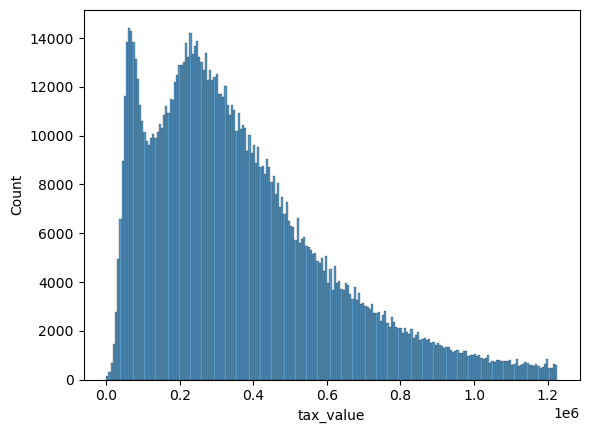

In [159]:
sns.histplot(new_df['tax_value'])
plt.show()

In [160]:
# scaling tax value using minmax scalar

mm_scalar = RobustScaler()

In [161]:
mm_scalar.fit(new_df[['tax_value']])

RobustScaler()

In [162]:
mm_tax_value = mm_scalar.transform(new_df[['tax_value']])

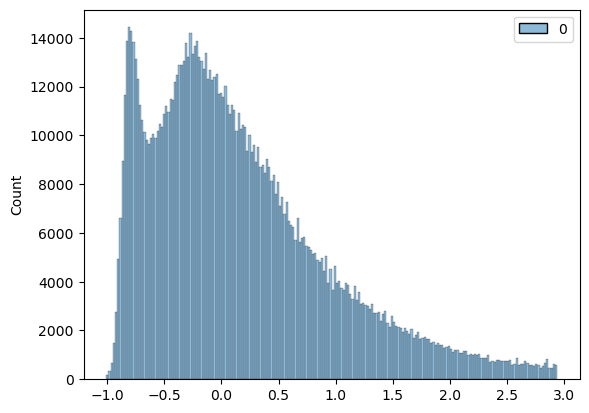

In [163]:
sns.histplot(mm_tax_value)
plt.show()

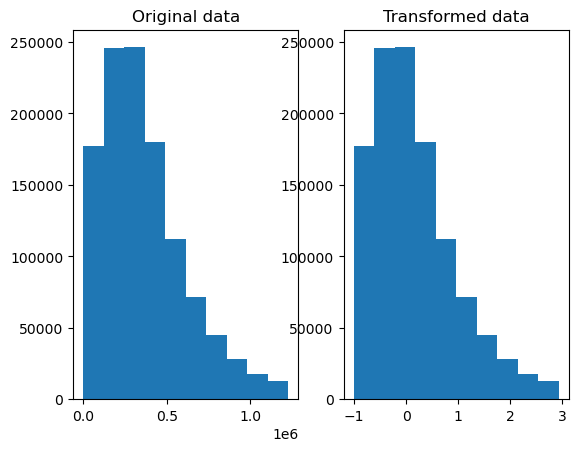

In [164]:
plt.subplot(121)
plt.hist(new_df['tax_value'])
plt.title('Original data')

plt.subplot(122)
plt.hist(mm_tax_value)
plt.title('Transformed data')
plt.show()#these are notes from class

In [44]:
taxes = test['tax_value']

In [45]:
taxes_adjusted = taxes[taxes.between(taxes.quantile(.05), taxes.quantile(.95))]
#another

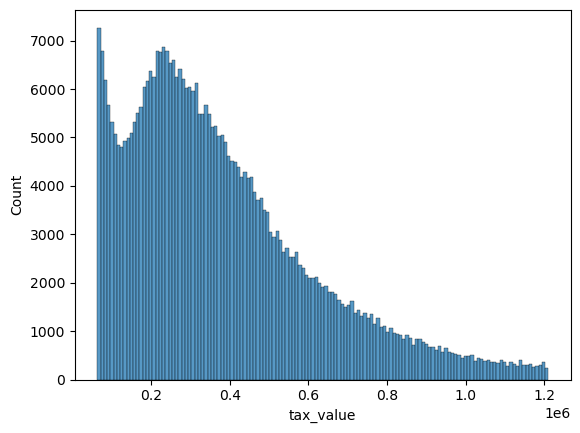

In [46]:
sns.histplot(taxes_adjusted)
plt.show()